In [1]:
# Model dependencies
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree


In [2]:
# other python dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# importing data

# data files
file_path = "AB_NYC_2019.csv"


# Read the data into pandas
airbnb_df = pd.read_csv(file_path)

# preview data
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Cleaning data

# creating a copy of the dataset to work with in case anything happens
dataset = airbnb_df.copy()

# replacing NaN with 0
dataset.fillna(0, inplace = True)

# Previewing data
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Cleaning data

# dropping rows with prices above $250 a night 
dataset.drop(dataset.index[dataset['price'] > 250], inplace = True)

In [6]:
# Cleaning data

# dropping columns not needed
dataset = dataset.drop(columns=["id","name","host_id","host_name",
                                "last_review","neighbourhood","latitude","longitude","minimum_nights", 
                                "number_of_reviews","calculated_host_listings_count"])

# resetting index
dataset.reset_index(drop=True, inplace=True)

# previewing data
dataset.head()

,neighbourhood_group,room_type,price,reviews_per_month,availability_365
0,Brooklyn,Private room,149,0.21,365
1,Manhattan,Entire home/apt,225,0.38,355
2,Manhattan,Private room,150,0.00,365
3,Brooklyn,Entire home/apt,89,4.64,194
4,Manhattan,Entire home/apt,80,0.10,0


In [7]:
# Preprocessing data

# encoding categorical data
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')



# view shape of x data and preview
print(dataset.shape)
dataset.head()

(43687, 11)


,price,reviews_per_month,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,149,0.21,365,0,1,0,0,0,0,1,0
1,225,0.38,355,0,0,1,0,0,1,0,0
2,150,0.00,365,0,0,1,0,0,0,1,0
3,89,4.64,194,0,1,0,0,0,1,0,0
4,80,0.10,0,0,0,1,0,0,1,0,0


In [8]:
# Preprocessing data

# splitting dataset into x and y
x = dataset.drop(columns=["price"])
y = dataset["price"]

In [9]:
# Saving column names for later 
feature_names = x.columns

In [10]:
# Preprocessing data

# Split data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [11]:
# Preprocessing data
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
x_scaler = StandardScaler().fit(x_train)


In [12]:
# Preprocessing data

# Transform the training and testing data using the X_scaler
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)


In [13]:
# Checking shape of data
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(32765, 10)
(10922, 10)


In [32]:
# Model creation
regr = RandomForestRegressor(max_depth=5, random_state=101)

# fitting data to model to train it
regr.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=5, random_state=101)

In [33]:
# getting score of model
regr.score(x_test_scaled, y_test)

0.4864944835375761

In [34]:
# creating predictions using test data
predictions = regr.predict(x_test)

# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', r2)

Mean Absolute Error: 33.43
Mean Squared Error: 1821.72
R-squared scores: 0.4417163043743575


In [35]:
# checking feature importance
sorted(zip(regr.feature_importances_, feature_names), reverse=True)

[(0.8200743059989004, 'Entire home/apt'),
 (0.12070504133188484, 'Manhattan'),
 (0.025579299965043593, 'availability_365'),
 (0.01402760121067482, 'reviews_per_month'),
 (0.011826531281977163, 'Brooklyn'),
 (0.003553459199957395, 'Private room'),
 (0.003424047445730467, 'Shared room'),
 (0.0005742267769440084, 'Queens'),
 (0.00017348778686426697, 'Bronx'),
 (6.199900202308877e-05, 'Staten Island')]

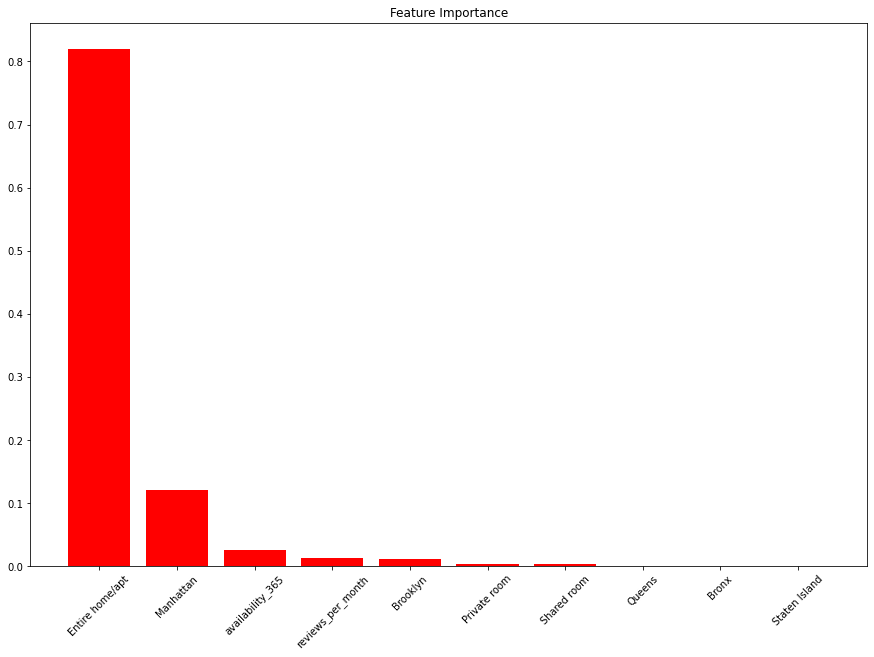

In [36]:
# Plotting feature importantance

# storing feature importance
importances = regr.feature_importances_


# save indices and sort
indices = np.argsort(importances)[::-1]

# figure size
plt.figure(figsize=(15,10))

# title
plt.title("Feature Importance")

# plotting bar grapgh
plt.bar(range(x.shape[1]), importances[indices],
        color="r", align="center")

# plotting names of x axis
plt.xticks(range(x.shape[1]), [feature_names[i] for i in indices], rotation=45)

# showing chart
plt.show()

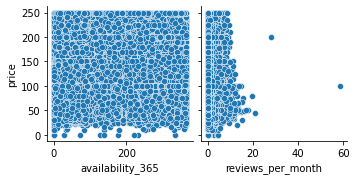

In [37]:
sns.pairplot(data = dataset,
             x_vars = ['availability_365','reviews_per_month'],
             y_vars = ['price'], diag_kind='kde')




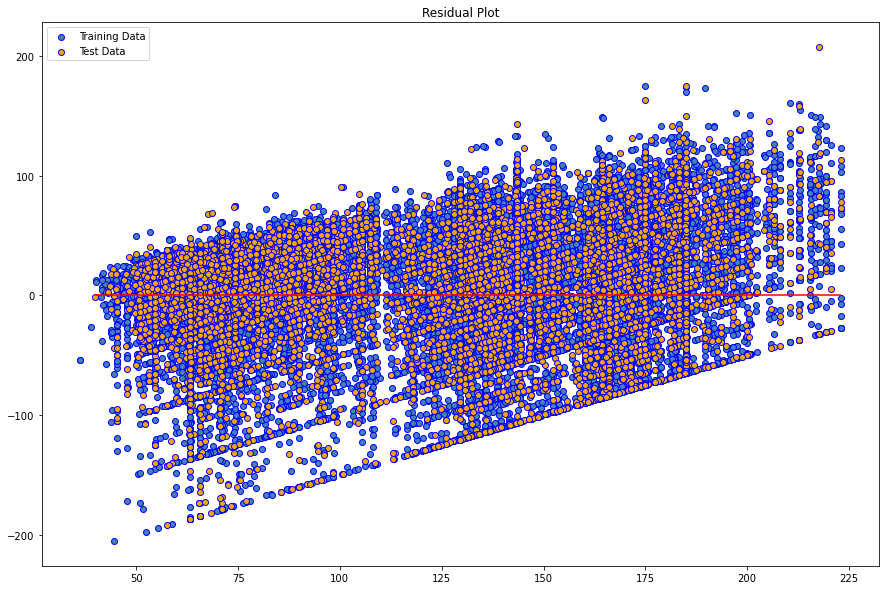

In [30]:

# Plot Residuals
# figure size
plt.figure(figsize=(15,10))
plt.scatter(regr.predict(x_train), regr.predict(x_train) - y_train, c="steelblue",edgecolors='b', label="Training Data")
plt.scatter(regr.predict(x_test), regr.predict(x_test) - y_test, c="orange",edgecolors='b', label="Test Data")
plt.legend()
plt.hlines(y=0, color="red", xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

In [38]:
# saving model

import joblib
file = "rf.h5"
joblib.dump(regr, file)

['rf.h5']